Progress:  0.0 %
Progress:  1.0 %
Progress:  2.0 %
Progress:  3.0 %
Progress:  4.0 %
Progress:  5.0 %
Progress:  6.0 %
Progress:  7.000000000000001 %
Progress:  8.0 %
Progress:  9.0 %
Progress:  10.0 %
Progress:  11.0 %
Progress:  12.0 %
Progress:  13.0 %
Progress:  14.000000000000002 %
Progress:  15.0 %
Progress:  16.0 %
Progress:  17.0 %
Progress:  18.0 %
Progress:  19.0 %
Progress:  20.0 %
Progress:  21.0 %
Progress:  22.0 %
Progress:  23.0 %
Progress:  24.0 %
Progress:  25.0 %
Progress:  26.0 %
Progress:  27.0 %
Progress:  28.000000000000004 %
Progress:  28.999999999999996 %
Progress:  30.0 %
Progress:  31.0 %
Progress:  32.0 %
Progress:  33.0 %
Progress:  34.0 %
Progress:  35.0 %
Progress:  36.0 %
Progress:  37.0 %
Progress:  38.0 %
Progress:  39.0 %
Progress:  40.0 %
Progress:  41.0 %
Progress:  42.0 %
Progress:  43.0 %
Progress:  44.0 %
Progress:  45.0 %
Progress:  46.0 %
Progress:  47.0 %
Progress:  48.0 %
Progress:  49.0 %
Progress:  50.0 %
Progress:  51.0 %
Progress:  52.0 %


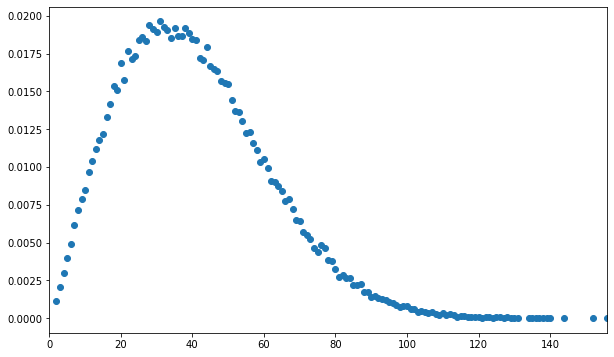

In [238]:
import numpy as np
import matplotlib.pyplot as plt
# I'm doing research on Wire EDM. I'm trying to come up with a model for the
# probability of the wire breaking. To do it, I assume I have a wire of length
# 100 mm and sparks happen randomly in the wire, and each spark occupies 100 um.
# Then, if 5 sparks overlapp, the wire breaks. I want to plot the probability of
# the wire breaking with the number of sparks in the wire. Can you write a
# python script for this simulation?

wire_length = 10**5 # um
crater_length = 10**2 # um
 
N_boxes = wire_length // crater_length # number of boxes where sparks can happen
N = 100000 # number of simulations
max_sparks = 1 # maximum number of sparks that can happen in a place

# define a function to test when the wire breaks

def test_wire_break(N_boxes, max_sparks):
    # distribution is discrete
    # Let's make a list of the number of places where sparks can happen
    places = [0] * N_boxes
    counter = 0
    while True:
        counter += 1
        random_place = np.random.randint(0, N_boxes)
        places[random_place] += 1
        if places[random_place] > max_sparks:
            return counter
            break    

spark_number = []
for i in range(N):
    spark_number.append(test_wire_break(N_boxes, max_sparks))
    # print progress each N/100 iterations
    if i % (N//100) == 0:
        print("Progress: ", i/N*100, "%")
    
spark_number = np.array(spark_number)
print("Len of spark_number: ", len(spark_number))
sorted_spark_number = np.sort(spark_number)
print("Len of sorted_spark_number: ", len(sorted_spark_number))
# create a dictionary of the number of sparks and the number of times it happens
frequency = {}
for i in sorted_spark_number:
    if i in frequency:
        frequency[i] += 1
    else:
        frequency[i] = 1
# Now normalize the frequency
print("Len of frequency: ", len(frequency))
for i in frequency:
    frequency[i] = frequency[i] / N
plt.figure(figsize=(10, 6)) 
plt.scatter(frequency.keys(), frequency.values())
plt.xlim(0, max(frequency.keys()))
plt.show()

c:\Users\geduardo\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2108: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


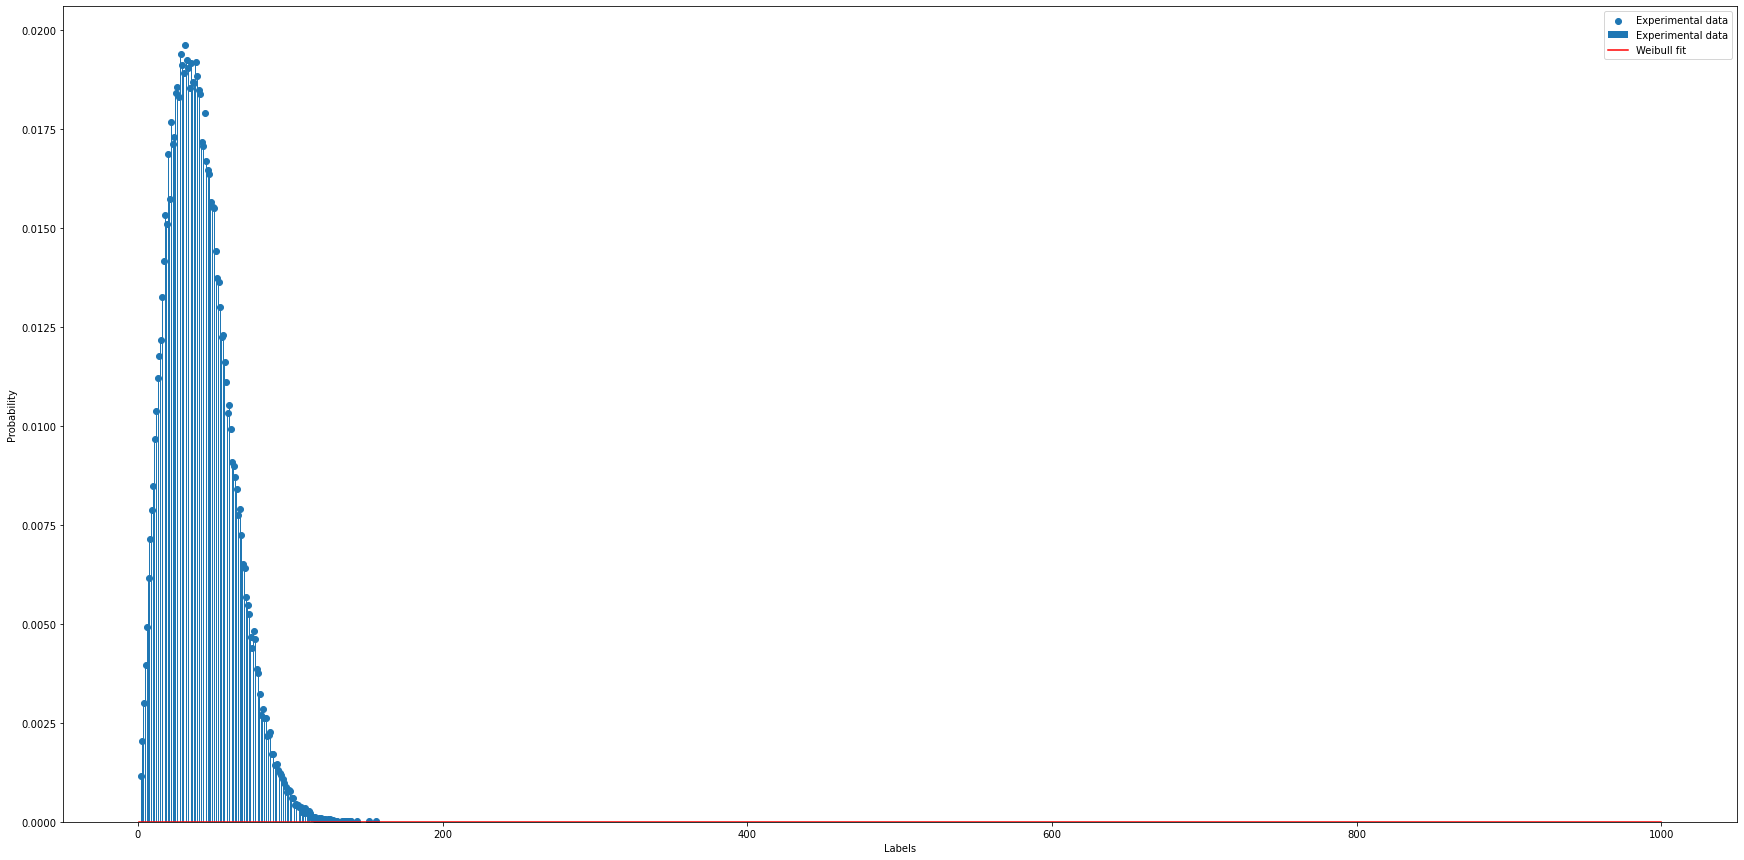

Shape:  0.5970482675462441
Scale:  0.005278715018700162


In [240]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min


# Convert the dictionary into two lists for easier processing
keys = list(frequency.keys())
values = list(frequency.values())

# Generate the Weibull distribution data with integer x values
x = np.linspace(0, N_boxes*max_sparks, N_boxes*max_sparks+1)


params = weibull_min.fit(values, floc=0)
shape, loc, scale = params
y = weibull_min.pdf(x, shape, loc, scale)

plt.figure(figsize=(30, 15))
# Plot the experimental data
plt.scatter(keys, values, label='Experimental data')
plt.hist(frequency.keys(), bins=len(frequency)*2, weights=frequency.values(), label='Experimental data')
# Plot the Weibull fit
plt.plot(x, y, label='Weibull fit', color='r')

plt.xlabel('Labels')
plt.ylabel('Probability')
plt.legend()
plt.show()

print("Shape: ", shape)
print("Scale: ", scale)

In [194]:
import numpy as np

def weibull(x, shape, scale):
    x = np.array(x, dtype=np.longdouble)
    shape = np.longdouble(shape)
    scale = np.longdouble(scale)
    return (shape / scale) * (x / scale)**(shape - 1) * np.exp(-(x / scale)**shape)

# Make sure x is defined with the desired dtype (e.g., longdouble)
x = np.array(x, dtype=np.longdouble)
y = weibull(x, shape, scale)
y = y / np.sum(y)


{0.0: 0.0,
 1.001001001001001: 0.0007378443394028538,
 2.002002002002002: 0.0015592928464695272,
 3.0030030030030033: 0.0024123829119399734,
 4.004004004004004: 0.0032830862835068714,
 5.005005005005005: 0.004163199620106021,
 6.0060060060060065: 0.005046726707325817,
 7.007007007007008: 0.005928765159218311,
 8.008008008008009: 0.0068050501682340135,
 9.00900900900901: 0.0076717369248296115,
 10.01001001001001: 0.008525287353422787,
 11.011011011011012: 0.009362408325306394,
 12.012012012012013: 0.010180017511251655,
 13.013013013013014: 0.010975224977925423,
 14.014014014014016: 0.011745324106690155,
 15.015015015015017: 0.012487788140971323,
 16.016016016016017: 0.013200270121782385,
 17.017017017017018: 0.013880604790108652,
 18.01801801801802: 0.014526811519401571,
 19.01901901901902: 0.015137097640767115,
 20.02002002002002: 0.01570986171591346,
 21.021021021021024: 0.016243696441525915,
 22.022022022022025: 0.016737390957929126,
 23.023023023023026: 0.017189932399066802,
 24.024

In [223]:
cdf

{0.0: 0.0,
 1.001001001001001: 0.0007378443394028538,
 2.002002002002002: 0.002297137185872381,
 3.0030030030030033: 0.004709520097812355,
 4.004004004004004: 0.007992606381319226,
 5.005005005005005: 0.012155806001425247,
 6.0060060060060065: 0.017202532708751064,
 7.007007007007008: 0.023131297867969376,
 8.008008008008009: 0.02993634803620339,
 9.00900900900901: 0.037608084961033,
 10.01001001001001: 0.04613337231445579,
 11.011011011011012: 0.05549578063976218,
 12.012012012012013: 0.06567579815101383,
 13.013013013013014: 0.07665102312893926,
 14.014014014014016: 0.08839634723562942,
 15.015015015015017: 0.10088413537660074,
 16.016016016016017: 0.11408440549838313,
 17.017017017017018: 0.12796501028849178,
 18.01801801801802: 0.14249182180789335,
 19.01901901901902: 0.15762891944866048,
 20.02002002002002: 0.17333878116457394,
 21.021021021021024: 0.18958247760609986,
 22.022022022022025: 0.20631986856402898,
 23.023023023023026: 0.22350980096309578,
 24.024024024024026: 0.241110

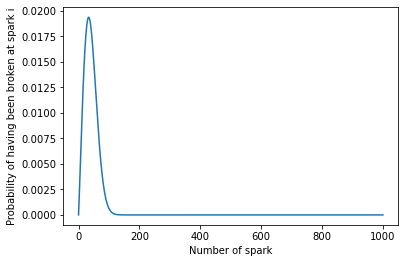

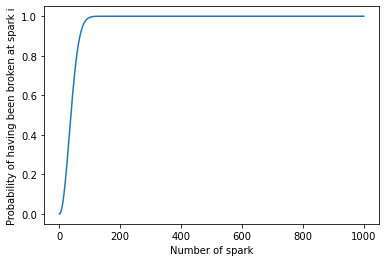

C:\Users\geduardo\AppData\Local\Temp\ipykernel_16120\3400283136.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  probability_of_breaking_in_next_spark[i] = frequency[i] / (1 - cdf[prev_key])


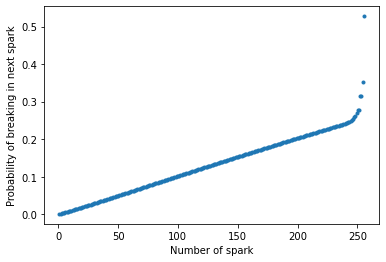

In [222]:
# Now we create a probability mass function from the Weibull distribution 
# to do so we need to normalize y
frequency_weibull = {}
for i in range(len(x)):
    frequency_weibull[x[i]] = y[i]


frequency = frequency_weibull

plt.plot(list(frequency.keys()), list(frequency.values()))
plt.xlabel('Number of spark')
plt.ylabel('Probability of having been broken at spark i')
plt.show()
# Now let's calculate the cumulative distribution function
cdf = {}
sorted_keys = np.sort(list(frequency.keys()))
sorted_values = np.array([frequency[key] for key in sorted_keys], dtype=np.longdouble)
cumulative_values = np.cumsum(sorted_values, dtype=np.longdouble)

for i, key in enumerate(sorted_keys):
    cdf[key] = cumulative_values[i]
    
plt.plot(list(cdf.keys()), list(cdf.values()))
plt.xlabel('Number of spark')
plt.ylabel('Probability of having been broken at spark i')
plt.show()
# Now let's the conditional probability of the wire breaking in the next spark
# which is given by P(wire breaks in spark i | wire is not broken at spark i-1)
# = P(wire breaks in spark i) / 1 - P(wire is not broken at spark i-1)
# P(wire is not broken at spark i-1) = cdf[i-1]
# P(wire breaks in spark i) = frequency[i]

probability_of_breaking_in_next_spark = {}
prev_key = None
for i in sorted(frequency.keys()):  # Iterate through the sorted keys
    if prev_key is not None:
        probability_of_breaking_in_next_spark[i] = frequency[i] / (1 - cdf[prev_key])
    prev_key = i

# Plotting the probability_of_breaking_in_next_spark
plt.figure()
plt.plot(list(probability_of_breaking_in_next_spark.keys()), list(probability_of_breaking_in_next_spark.values()),'.')
plt.xlabel('Number of spark')
plt.ylabel('Probability of breaking in next spark')
plt.show()

C:\Users\geduardo\AppData\Local\Temp\ipykernel_16120\1658638636.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(shape / scale) + (shape - 1) * np.log(x / scale) - (x / scale)**shape


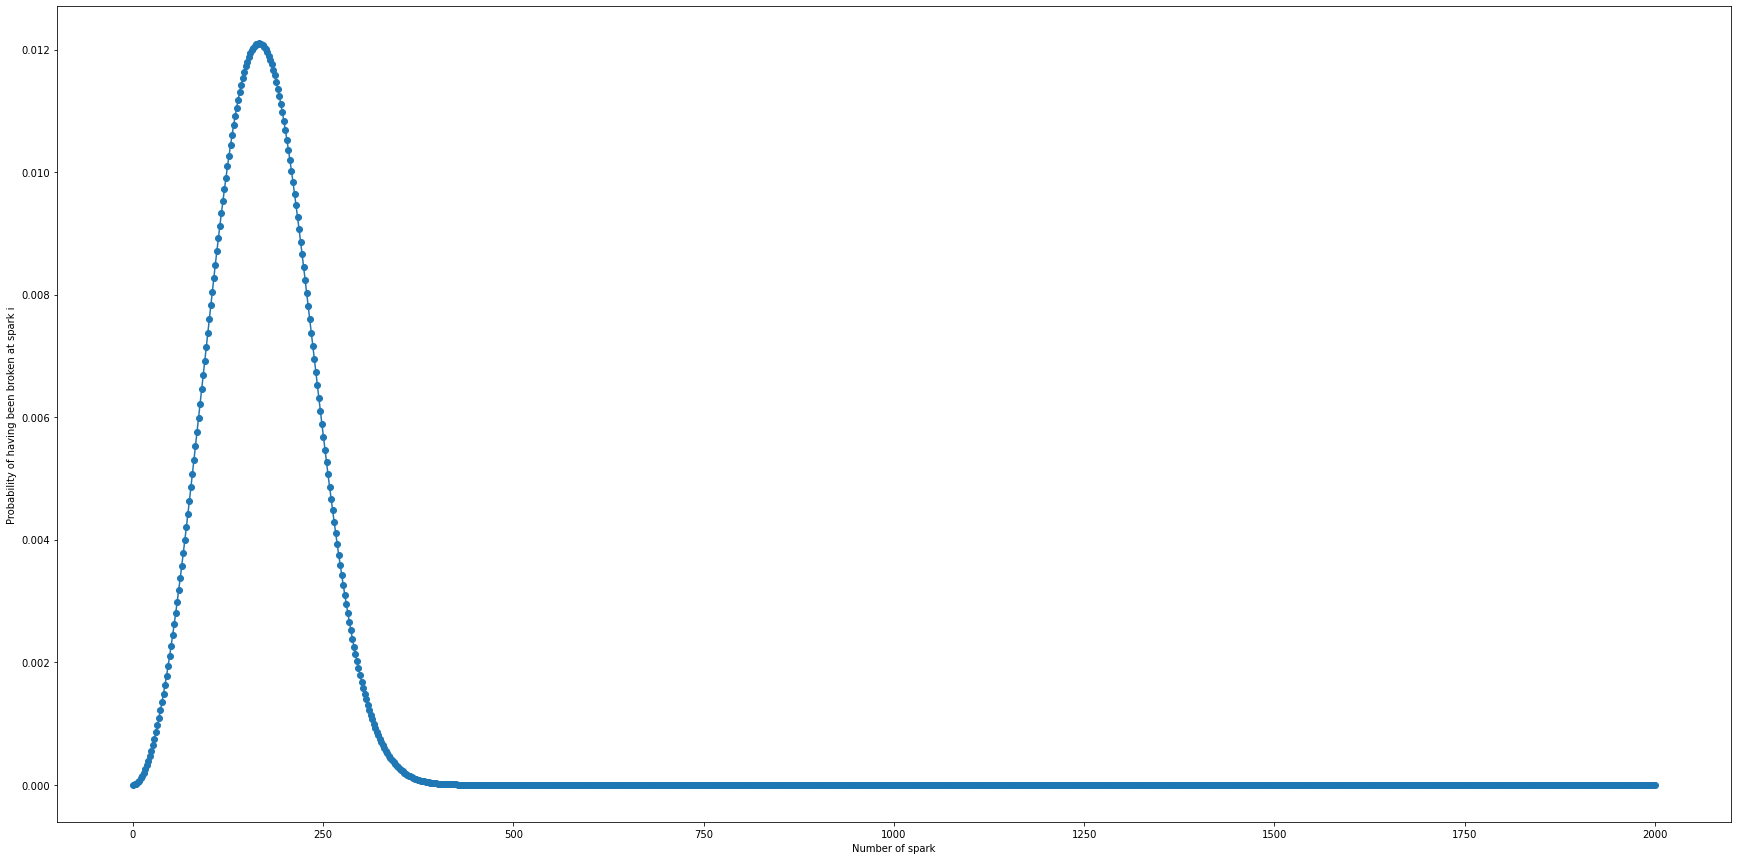

C:\Users\geduardo\AppData\Local\Temp\ipykernel_16120\188554804.py:22: RuntimeWarning: divide by zero encountered in log
  log_cdf = np.log(np.cumsum(np.exp(log_y)))


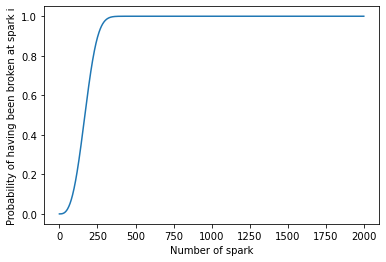

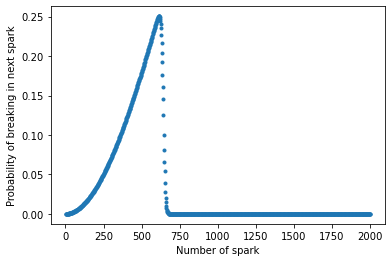

In [183]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate log_y
log_y = log_weibull(x, shape, scale)

# Normalize log_y
log_y = log_y - np.log(np.sum(np.exp(log_y)))

# Create a dictionary for the frequency_weibull
frequency_weibull = {x[i]: np.exp(log_y[i]) for i in range(len(x))}

# Plotting
plt.figure(figsize=(30, 15))
plt.scatter(frequency_weibull.keys(), frequency_weibull.values())
plt.plot(list(frequency_weibull.keys()), list(frequency_weibull.values()))
plt.xlabel('Number of spark')
plt.ylabel('Probability of having been broken at spark i')
plt.show()

# Cumulative distribution function
log_cdf = np.log(np.cumsum(np.exp(log_y)))

cdf = {x[i]: np.exp(log_cdf[i]) for i in range(len(x))}
plt.plot(list(cdf.keys()), list(cdf.values()))
plt.xlabel('Number of spark')
plt.ylabel('Probability of having been broken at spark i')
plt.show()

# Conditional probability of the wire breaking in the next spark
probability_of_breaking_in_next_spark = {}
prev_key = None
for i in sorted(frequency_weibull.keys()):  # Iterate through the sorted keys
    if prev_key is not None:
        probability_of_breaking_in_next_spark[i] = np.exp(log_y[x == i][0] - np.log(1 - np.exp(log_cdf[x == prev_key][0])))
    prev_key = i

# Plotting the probability_of_breaking_in_next_spark
plt.figure()
plt.plot(list(probability_of_breaking_in_next_spark.keys()), list(probability_of_breaking_in_next_spark.values()), '.')
plt.xlabel('Number of spark')
plt.ylabel('Probability of breaking in next spark')
plt.show()

In [42]:
!pip install matplotlib ipympl

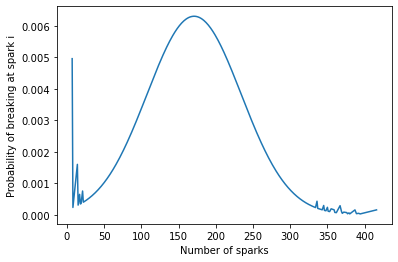

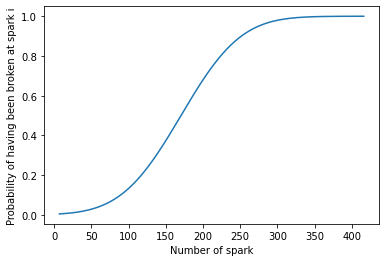

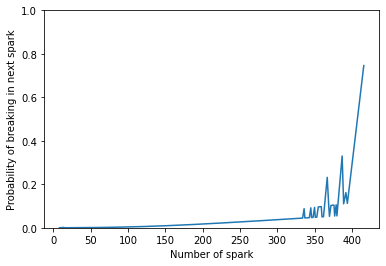

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

spark_number = np.array(spark_number)
sorted_spark_number = np.sort(spark_number)

# Calculate the mean and standard deviation
mean = np.mean(spark_number)
std_dev = np.std(spark_number)

# Calculate the probability density function for each unique spark number
unique_sparks = np.unique(sorted_spark_number)
cdf_values = norm.cdf(unique_sparks, mean, std_dev)

# Create the new frequency dictionary (approximated PMF)
new_frequency = {unique_sparks[i]: cdf_values[i] - cdf_values[i - 1] if i > 0 else cdf_values[i]
                 for i in range(len(unique_sparks))}

# Plot the new frequency
plt.plot(list(new_frequency.keys()), list(new_frequency.values()))
plt.xlabel('Number of sparks')
plt.ylabel('Probability of breaking at spark i')
plt.show()

# Now let's calculate the cumulative distribution function
cdf = {}
for i in new_frequency:
    cdf[i] = sum(new_frequency[j] for j in new_frequency if j <= i)

plt.plot(list(cdf.keys()), list(cdf.values()))
plt.xlabel('Number of spark')
plt.ylabel('Probability of having been broken at spark i')
plt.show()

# Now let's calculate the conditional probability of the wire breaking in the next spark
probability_of_breaking_in_next_spark = {}
prev_key = None
for i in sorted(new_frequency.keys()):  # Iterate through the sorted keys
    if prev_key is not None:
        probability_of_breaking_in_next_spark[i] = new_frequency[i] / (1 - cdf[prev_key])
    prev_key = i

# Plotting the probability_of_breaking_in_next_spark
plt.figure()
plt.plot(list(probability_of_breaking_in_next_spark.keys()), list(probability_of_breaking_in_next_spark.values()))
plt.xlabel('Number of spark')
plt.ylabel('Probability of breaking in next spark')
plt.ylim(0, 1)
plt.show()

C:\Users\geduardo\AppData\Local\Temp\ipykernel_17956\3508319153.py:33: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(spark_number, spark_number/(1-cdf))


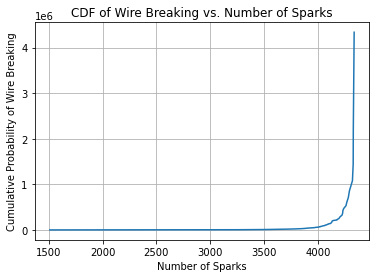

In [31]:
import numpy as np
import matplotlib.pyplot as plt

wire_length = 10**5  # um
crater_length = 10**2  # um

def test_wire_break(Wire_length, crater_length):
    N = wire_length // crater_length
    places = [0] * N
    counter = 0

    while True:
        counter += 1
        random_place = np.random.randint(0, N)
        places[random_place] += 1

        if places[random_place] > 10:
            break

    return counter

num_simulations = 1000
spark_number = []

for i in range(num_simulations):
    spark_number.append(test_wire_break(wire_length, crater_length))

# Calculate the cumulative distribution function (CDF)
spark_number = sorted(spark_number)
cdf = np.arange(1, num_simulations + 1) / num_simulations

# Plot the CDF
plt.plot(spark_number, spark_number/(1-cdf))
plt.xlabel("Number of Sparks")
plt.ylabel("Cumulative Probability of Wire Breaking")
plt.title("CDF of Wire Breaking vs. Number of Sparks")
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# I'm doing research on Wire EDM. I'm trying to come up with a model for the
# probability of the wire breaking. To do it, I assume I have a wire of length
# 100 mm and sparks happen randomly in the wire, and each spark occupies 100 um.
# Then, if 5 sparks overlapp, the wire breaks. I want to plot the probability of
# the wire breaking with the number of sparks in the wire. Can you write a
# python script for this simulation?

wire_length = 10**5 # um
crater_length = 10**2 # um

N = 1000000 # number of places where sparks can happen if distribution is discrete


# define a function to test when the wire breaks

def test_wire_break(Wire_length, crater_length):
    N = wire_length // crater_length # number of places where sparks can happen if 
    # distribution is discrete
    # Let's make a list of the number of places where sparks can happen
    places = [0] * N
    counter = 0
    while True:
        counter += 1
        random_place = np.random.randint(0, N)
        places[random_place] += 1
        if places[random_place] > 1:
            return counter
            break
        # print progress and remaining time
        if counter % 10000 == 0:
            print('Progress: {0:.2f} %'.format(counter / N * 100))
            print('Remaining time: {0:.2f} minutes'.format((N - counter) / counter * 0.1))

spark_number = []
for i in range(N):
    spark_number.append(test_wire_break(wire_length, crater_length))
    
spark_number = np.array(spark_number)
sorted_spark_number = np.sort(spark_number)
# create a dictionary of the number of sparks and the number of times it happens
frequency = {}
for i in sorted_spark_number:
    if i in frequency:
        frequency[i] += 1
    else:
        frequency[i] = 1
# Now normalize the frequency
for i in frequency:
    frequency[i] = frequency[i] / N
 
plt.scatter(frequency.keys(), frequency.values())